In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import skew

In [80]:
data=pd.read_csv("/content/PersonalityData_ExternalVersion001.csv")
data.head(20)

,uid,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
0,1,2.444444,3.4,3.444444,7.0,6.0,5.5,3.5,3.5,48.59,...,4.86,1.31,2.05,0.66,0.92,1.14,4.37,0.71,15.11,45.70
1,2,1.888889,2.4,2.777778,7.0,4.5,6.0,3.0,5.5,41.29,...,8.28,0.04,0.46,2.34,2.99,0.38,1.46,2.83,21.90,53.49
2,3,1.111111,3.0,3.444444,5.5,6.0,6.0,6.5,3.0,14.65,...,3.07,0.20,2.63,1.72,0.64,0.42,2.74,0.11,10.13,32.77
3,4,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,...,1.65,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67
4,5,2.111111,3.1,1.333333,6.0,5.5,2.5,5.5,5.0,52.63,...,1.12,0.08,1.14,0.38,0.85,1.05,4.67,0.38,8.34,34.25
5,6,2.000000,3.0,2.111111,5.0,4.5,5.5,6.0,3.5,19.32,...,1.05,0.18,1.20,1.22,1.88,0.16,4.08,0.65,6.05,31.65
6,7,1.777778,2.4,1.777778,3.5,3.0,1.0,4.5,3.0,35.62,...,1.97,0.23,1.12,0.41,1.29,0.62,4.46,0.28,8.04,32.54
7,8,1.777778,1.6,2.666667,6.0,4.5,5.5,6.0,3.5,41.20,...,3.87,0.25,2.43,2.94,0.73,0.52,2.97,0.42,15.54,42.17
8,9,2.666667,3.5,3.333333,6.0,5.0,1.5,4.0,6.5,49.94,...,2.85,0.32,1.27,1.07,1.04,1.66,3.98,0.45,12.85,43.73
9,10,2.000000,2.9,2.000000,2.5,6.5,4.0,4.5,5.0,39.96,...,2.96,0.76,1.10,3.28,3.46,0.41,3.56,0.71,11.36,38.50


#  Exploratory Data Analysis
* Dark Triad: psychopathy, machiavellianism, narcissism.
* Big Five: openness, conscientiousness, extraversion, agreeableness, neuroticism.
* Var1–Var100: Unknown variables (excluded from outlier detection due to lack of metadata).

In [64]:
# Display an overview of the data
print("Shape of the data:", data.shape)
print(data.info())
print(data.describe())


Shape of the data: (2927, 109)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Columns: 109 entries, uid to Var100
dtypes: float64(106), int64(2), object(1)
memory usage: 2.4+ MB
None
               uid  psychopathy  machiavellianism   narcissism     openness  \
count  2927.000000  2927.000000       2927.000000  2927.000000  2927.000000   
mean   1464.000000     1.975819          2.792552     2.726645     5.510420   
std     845.096444     0.590817          0.601120     0.611013     1.096339   
min       1.000000     1.000000          1.000000     1.000000     1.000000   
25%     732.500000     1.555556          2.400000     2.333333     5.000000   
50%    1464.000000     1.888889          2.800000     2.777778     5.500000   
75%    2195.500000     2.333333          3.200000     3.111111     6.500000   
max    2927.000000     4.666667          5.000000     4.777778     7.000000   

       conscientiousness  extraversion  agreeableness  neuroticism  \
count   

In [65]:
missing = data.isnull().sum()
print(missing[missing > 0])  # Show  columns with missing values

Var1      334
Var2      313
Var3      313
Var4      313
Var5      313
         ... 
Var96     327
Var97     327
Var98     327
Var99     327
Var100    327
Length: 98, dtype: int64


In [66]:
print("Duplicates:", data.duplicated().sum())
# no dublicate

Duplicates: 0


# Data Profiling

In [67]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9f577b5826744f23e32a7dbfb161695651ea7143887ad5f68cc31ef12aa47a58
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [68]:
from ydata_profiling import ProfileReport

profiling = ProfileReport(data,minimal=True)
profiling.to_file(output_file='psychopathy_Data_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 109/109 [00:02<00:00, 42.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# preprossing

In [81]:
# handle non number future

df=data
# Split into numerical and non-numerical (if any)
numeric_df = df.select_dtypes(include='number')
non_numeric_df = df.select_dtypes(exclude='number')
print(non_numeric_df.isna().sum())
data['Var20'] = pd.to_numeric(data['Var20'], errors='coerce')



Var20    0
dtype: int64


Skewness of numerical variables:
 Var21    51.590855
Var56    26.574362
Var22    24.492884
Var84    23.427740
Var90    19.630238
           ...    
Var41    -0.727853
Var38    -0.877058
Var35    -1.038873
Var25    -1.783785
Var24    -2.196117
Length: 109, dtype: float64


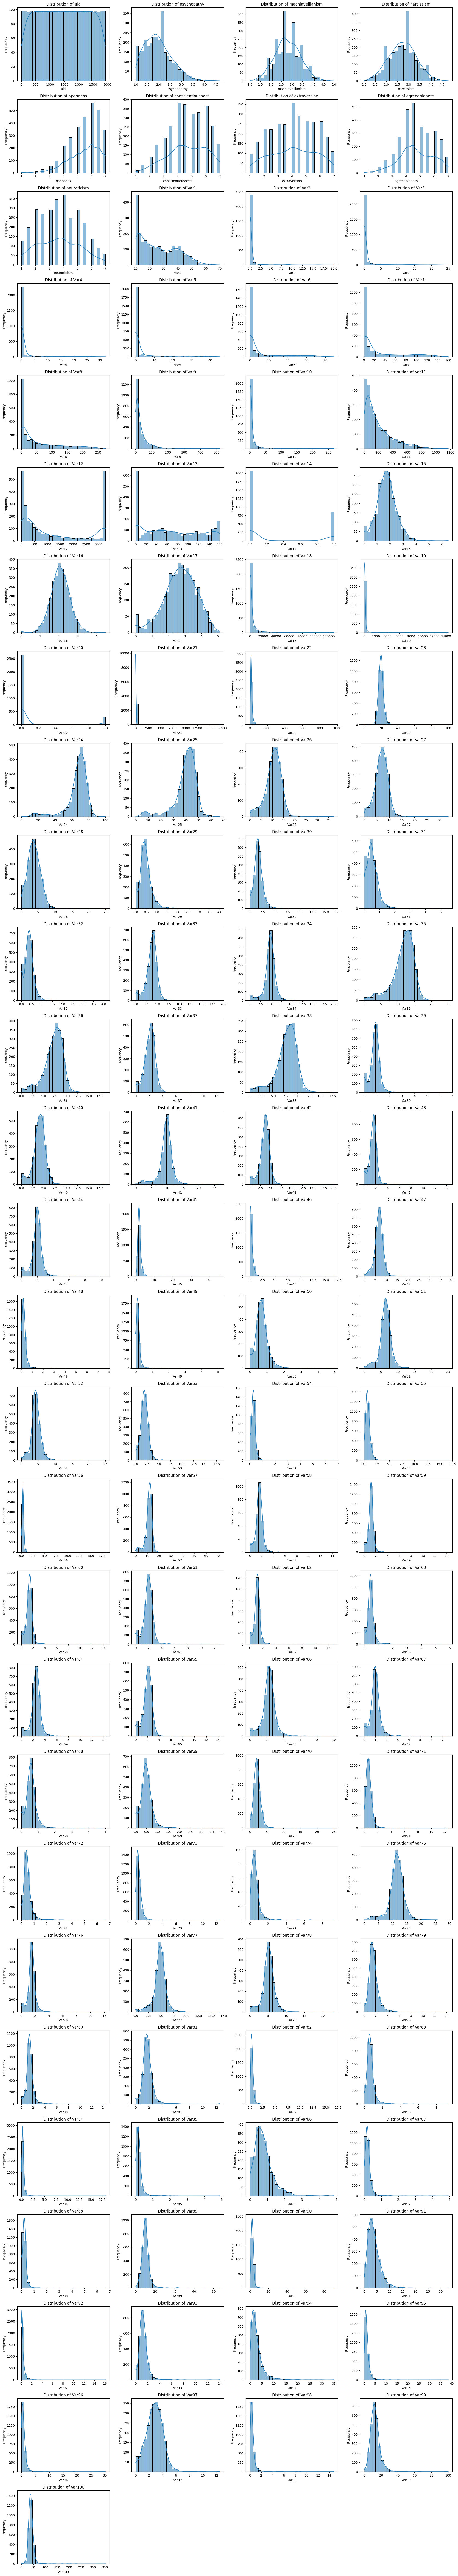


Imputation Strategy Recommendations:
uid: Symmetric distribution -> Mean imputation is recommended.
psychopathy: Skewed distribution -> Median imputation is recommended.
machiavellianism: Symmetric distribution -> Mean imputation is recommended.
narcissism: Symmetric distribution -> Mean imputation is recommended.
openness: Skewed distribution -> Median imputation is recommended.
conscientiousness: Symmetric distribution -> Mean imputation is recommended.
extraversion: Symmetric distribution -> Mean imputation is recommended.
agreeableness: Symmetric distribution -> Mean imputation is recommended.
neuroticism: Symmetric distribution -> Mean imputation is recommended.
Var1: Skewed distribution -> Median imputation is recommended.
Var2: Skewed distribution -> Median imputation is recommended.
Var3: Skewed distribution -> Median imputation is recommended.
Var4: Skewed distribution -> Median imputation is recommended.
Var5: Skewed distribution -> Median imputation is recommended.
Var6: Sk

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import math

# Step 1: Drop columns with all NaNs
numeric_df = data.dropna(axis=1, how='all')

# Step 2: Calculate skewness for each variable
skewness = numeric_df.apply(skew, nan_policy='omit').sort_values(ascending=False)
print("Skewness of numerical variables:\n", skewness)

# Step 3: Visualize distributions with histograms
num_cols = len(numeric_df.columns)
cols = 4  # number of plots per row
rows = math.ceil(num_cols / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, column in enumerate(numeric_df.columns, 1):
    if numeric_df[column].dropna().empty:
        continue  # Skip columns with only NaNs
    plt.subplot(rows, cols, i)
    sns.histplot(numeric_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 4: Recommendations for Imputation
print("\nImputation Strategy Recommendations:")
for col in numeric_df.columns:
    if col not in skewness or pd.isna(skewness[col]):
        print(f"{col}: Skewness not available (possibly all NaN)")
    elif abs(skewness[col]) < 0.5:
        print(f"{col}: Symmetric distribution -> Mean imputation is recommended.")
    else:
        print(f"{col}: Skewed distribution -> Median imputation is recommended.")


In [85]:
# Step 5: Impute missing values based on skewness
imputed_df = numeric_df.copy()

for col in numeric_df.columns:
    if numeric_df[col].isnull().sum() > 0:  # Only process columns with missing values
        if abs(skewness[col]) < 0.5:
            # Symmetric distribution → mean imputation
            imputer = SimpleImputer(strategy='mean')
        else:
            # Skewed distribution → median imputation
            imputer = SimpleImputer(strategy='median')

        # Apply imputation and update the column
        imputed_values = imputer.fit_transform(numeric_df[[col]])
        imputed_df[col] = imputed_values

# Step 6: Replace original numeric data with imputed data in the main dataframe
data[numeric_df.columns] = imputed_df

# Optional: Check if all NaNs are handled
print("Remaining missing values after imputation:\n", data[numeric_df.columns].isna().sum())

Remaining missing values after imputation:
 uid                 0
psychopathy         0
machiavellianism    0
narcissism          0
openness            0
                   ..
Var96               0
Var97               0
Var98               0
Var99               0
Var100              0
Length: 109, dtype: int64


In [82]:
#Scale data  adjusting the numbers in your data so they fit within a certain range or follow a certain shape.

from sklearn.preprocessing import StandardScaler

# Select numeric features to scale (excluding 'uid' or categorical if any)
numeric_features = data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Put back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_features.columns)
scaled_df['uid'] = data['uid']  # Optional: add uid back


# Outlier Detection and Removal

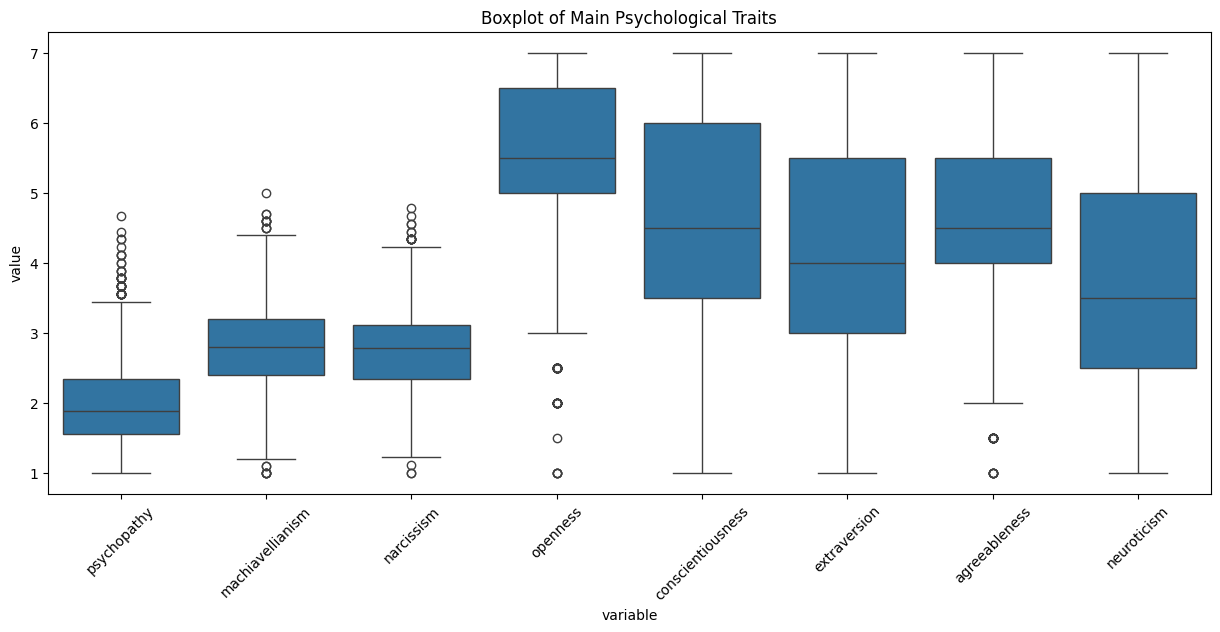

In [86]:
# Boxplots to visualize outliers per feature.

features_to_plot = ['psychopathy', 'machiavellianism', 'narcissism',
                    'openness', 'conscientiousness', 'extraversion',
                    'agreeableness', 'neuroticism']

plt.figure(figsize=(15, 6))
df_melted = data[features_to_plot].melt()
sns.boxplot(data=df_melted, x='variable', y='value')
plt.title('Boxplot of Main Psychological Traits')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# df=data
# # Visualize Z-Score Outliers
# z_scores = data[['psychopathy', 'machiavellianism']].apply(lambda x: (x - x.mean()) / x.std())
# outliers = z_scores.abs() > 2
# outlier_mask = outliers.any(axis=1)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=data['psychopathy'], y=data['machiavellianism'],
#                 hue=outlier_mask, size=outlier_mask, sizes=(50, 200),
#                 palette=['blue', 'orange'])
# plt.title('Psychopathy vs. Machiavellianism (Z-Score Outliers)')
# plt.xlabel('Psychopathy')
# plt.ylabel('Machiavellianism')
# plt.xlim(1.0, 4.0)
# plt.ylim(1.5, 4.5)
# plt.show()

In [87]:
# Using Interquartile Range (IQR) Method
numeric_features = data.select_dtypes(include='number')
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with any feature beyond 1.5*IQR
filtered_df = data[~((numeric_features < (Q1 - 1.5 * IQR)) |
                     (numeric_features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [88]:
# Using Z-Score Method
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
filtered_df_z = data[(abs_z_scores < 3).all(axis=1)]

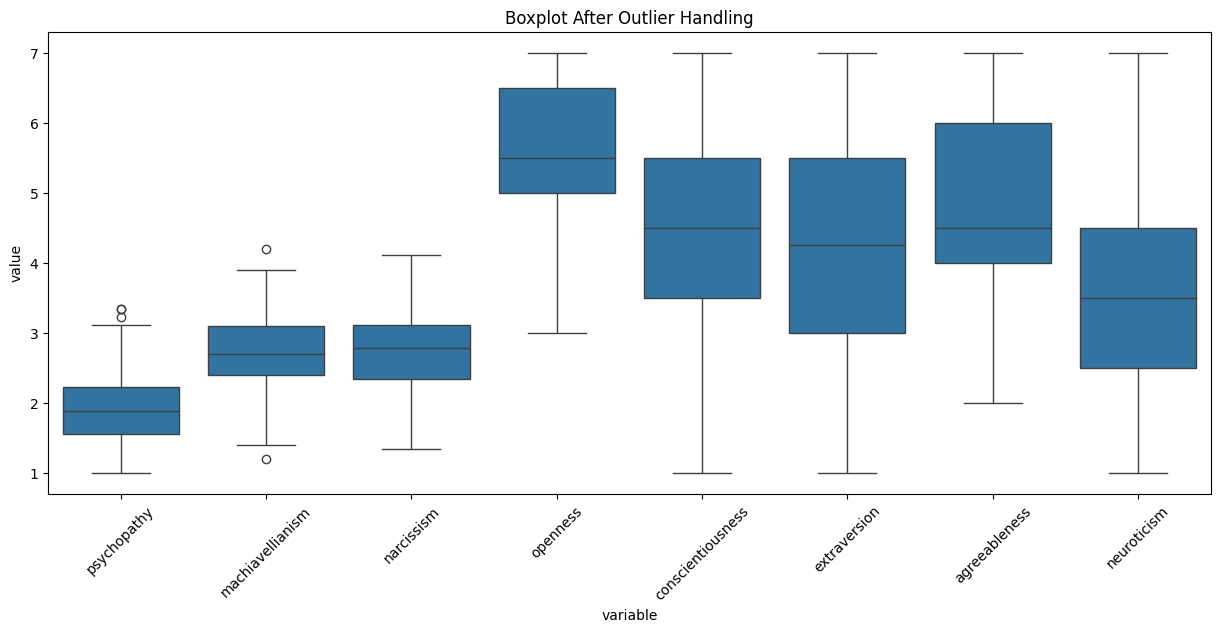

In [89]:
# Boxplots to visualize outliers per feature.

features_to_plot = ['psychopathy', 'machiavellianism', 'narcissism',
                    'openness', 'conscientiousness', 'extraversion',
                    'agreeableness', 'neuroticism']

plt.figure(figsize=(15, 6))
df_melted = filtered_df[features_to_plot].melt()
sns.boxplot(data=df_melted, x='variable', y='value')
plt.title('Boxplot After Outlier Handling')
plt.xticks(rotation=45)
plt.show()


In [90]:
data=filtered_df
data.head()

,uid,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,...,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100
3,4,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,...,1.65,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67
12,13,1.777778,3.6,3.000000,5.0,4.0,3.0,4.0,4.5,27.32,...,3.52,0.02,1.16,3.84,0.82,0.80,3.11,0.20,12.75,38.07
16,17,2.333333,2.9,2.888889,5.0,4.5,4.0,5.0,1.5,23.95,...,2.51,0.30,1.34,1.44,1.28,0.98,1.82,0.43,8.22,31.09
54,55,1.777778,2.8,2.555556,6.0,3.0,4.0,5.5,3.0,16.96,...,3.03,0.07,0.92,2.17,0.85,0.66,2.97,0.39,10.70,35.30
61,62,1.444444,2.6,2.222222,7.0,6.0,3.5,6.5,1.5,40.51,...,4.28,0.07,0.81,2.58,2.44,0.89,1.70,0.15,15.28,39.93


# Plot histograms for first 10 variables

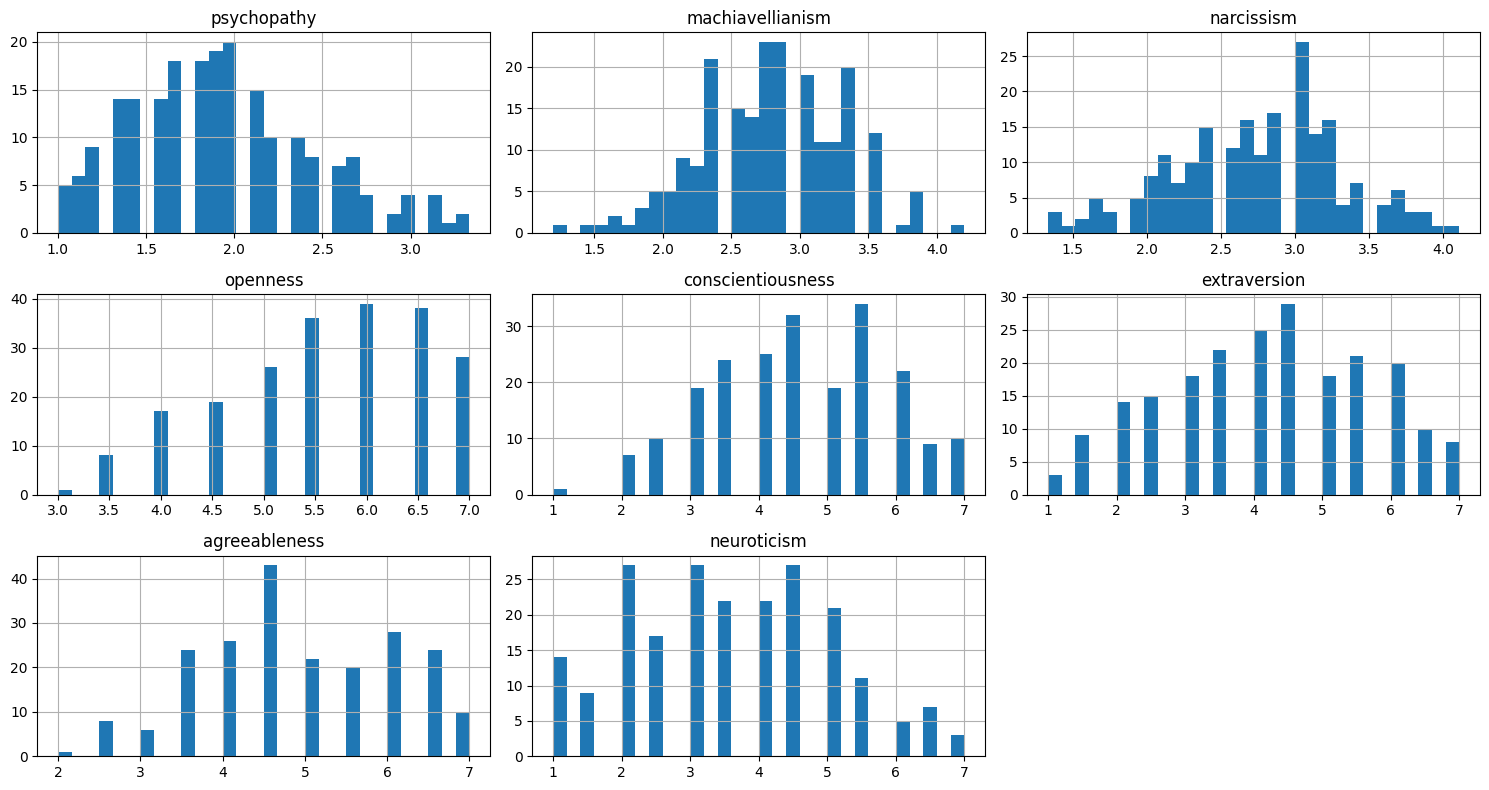

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for first 10 variables
data.iloc[:, 1:9].hist(bins=30, figsize=(15, 8))
plt.tight_layout()
plt.show()


# insights from histogram for Dark Triad Trait :
*  The weaker correlation between psychopathy and narcissism high psychopathy doesn’t always imply high narcissism
*   correlation between psychopathy and machiavellianism (0.43) suggests these traits often co-occur,



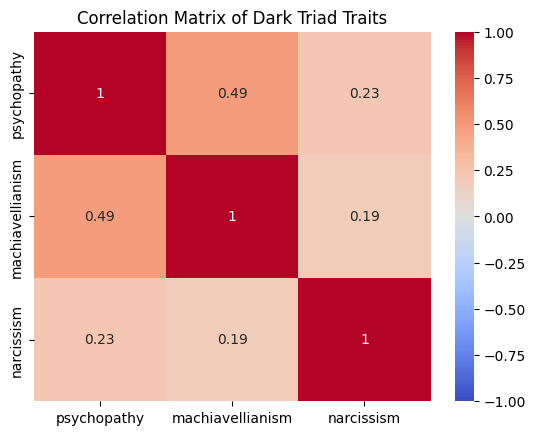

In [92]:
import seaborn as sns
import pandas as pd

# Correlation matrix
dark_triad = data[['psychopathy', 'machiavellianism', 'narcissism']]
corr_matrix = dark_triad.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Dark Triad Traits')
plt.show()

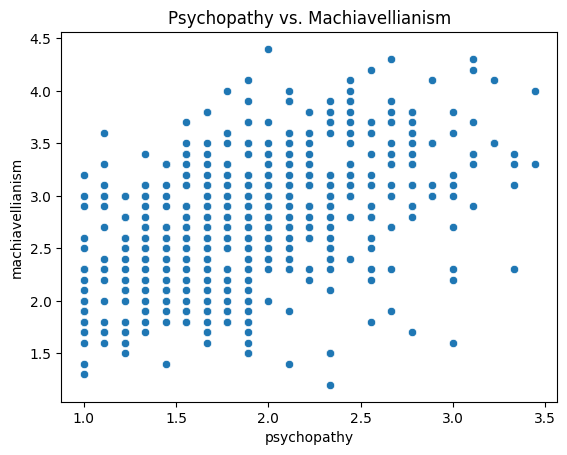

In [48]:
sns.scatterplot(x='psychopathy', y='machiavellianism',data= data)
plt.title('Psychopathy vs. Machiavellianism')
plt.show()

# Create new future based on psychpathy

In [49]:
# Create a new feature based on psychopathy status
data['psycho_status'] = data['psychopathy'].apply(lambda x: 1 if x > 1.98 else 0)

# Plot histogram for psycho_status
fig = px.histogram(data_frame=data, x='psycho_status', color='psycho_status')
fig.show()


# Machine Learning ...